In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2 as cv
import random
import time
import shutil

from constants import *
from visualisation import *
from character_classes import *
from build_dataset import *
from FacialDetector import *
from run_solutions import *

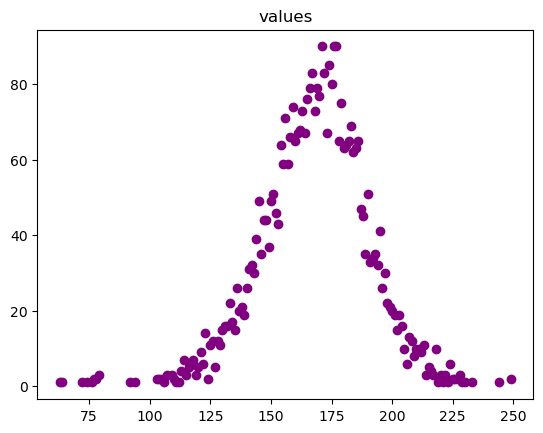

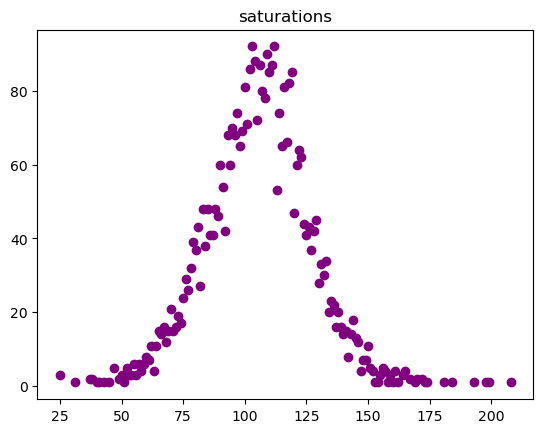

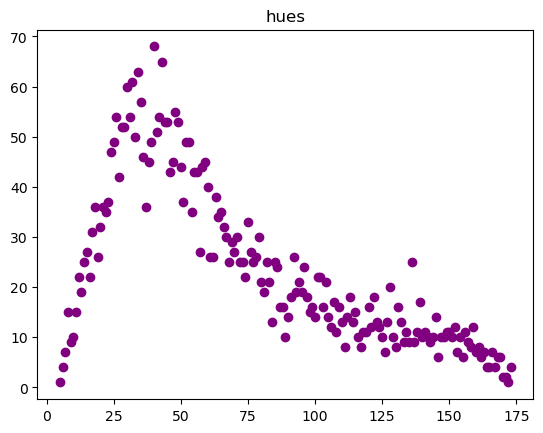

lowest var: 889.8556548375079, avg_var: 4278.765351521351, photos checked: 3957


In [2]:
get_stats()

directory ../saved_files exists 
loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
loaded negative example features
loaded negative example features
loaded negative example features
loaded negative example features
loaded negative example features
loaded liniar classifier
loaded liniar classifier
loaded liniar classifier
loaded liniar classifier
loaded liniar classifier
Procesam imaginea de testare 0/200..
[] []
Timpul de procesarea al imaginii de testare 0/200 este 1.581102 sec.
Procesam imaginea de testare 1/200..
[] []
Timpul de procesarea al imaginii de testare 1/200 este 1.967433 sec.
Procesam imaginea de testare 2/200..
[] []
Timpul de procesarea al imaginii de testare 2/200 este 1.656652 sec.
Procesam imaginea de testare 3/200..
[] []
Timpul de procesarea al imaginii de testare 3/200 este 2.093077 sec.
Procesam imaginea de testare 4/200..
[] []
Timpul de procesarea 

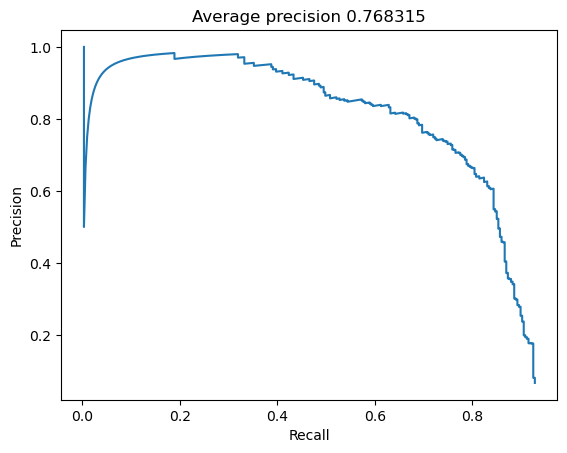

In [3]:
# run sollutions

run_classifier_for_all(os.path.join(VALIDATION_DIR, "validare"), os.path.join(VALIDATION_DIR, "task1_gt_validare.txt"))

In [4]:
#build datasets and show stats

# print_square_info()
# get_avg_variance()
# build_positives(DEXTER_DESCRIPTORS, DEXTER_DESCRIPTORS_WIDTH, DEXTER_DESCRIPTORS_HEIGHT, "dexter")

# build_negatives()

In [5]:
#init params

params: Parameters = Parameters(DEXTER_DESCRIPTORS_WIDTH, DEXTER_DESCRIPTORS_HEIGHT, DEXTER_DESCRIPTORS, os.path.join(FACES_DIR, "dexter"), "dexter")
params.current_character = "dexter"
params.custom_character_hard_mined = DEXTER_HARD_MINED_DIR
params.number_negative_examples =   len(os.listdir(NEGATIVE_DIR)) + \
                                    np.sum([len(os.listdir(os.path.join(FACES_DIR, faces_dir))) 
                                            for faces_dir in CHARACTERS[:4]]) + \
                                    np.sum([len(os.listdir(os.path.join(HARD_MINED_DIR, character))) 
                                            for character in CHARACTERS[:4]]) 
params.threshold = 0 # toate ferestrele cu scorul > threshold si maxime locale devin detectii
params.has_annotations = True

params.use_hard_mining = False  # (optional)antrenare cu exemple puternic negative
params.use_flip_images = True  # adauga imaginile cu fete oglindite

if params.use_flip_images:
    params.number_positive_examples = [v * 2 for v in params.number_positive_examples]

dexter_facial_detector: FacialDetector = FacialDetector(params)

directory ../saved_files exists 


In [6]:
# Pasii 1+2+3. Incarcam exemplele pozitive (cropate) si exemple negative generate
# verificam daca sunt deja existente

positive_features = []

for i in range(len(params.descriptors)):
    positive_features_path = os.path.join(params.dir_save_files, 'dexter_positive_descriptors_' + 
                            str(params.hog_cell_widths[i]) + 'X' + str(params.hog_cell_heights[i]) + '_' +
                            str(params.number_positive_examples[i]) + '.npy')

    if os.path.exists(positive_features_path):
        positive_features.append(np.load(positive_features_path))
        print('loaded positive example features')
    else:
        print('building positive features')
        positive_features.append(dexter_facial_detector.get_positive_descriptors(i))
        np.save(positive_features_path, positive_features[i])
        print('saved positive descriptors in %s' % positive_features_path)


loaded positive example features
loaded positive example features


In [7]:
# negative examples
negative_features = []

for i in range(len(params.descriptors)):
    negative_features_path = os.path.join(params.dir_save_files, 'dexter_negative_descriptors_' + 
                            str(params.hog_cell_widths[i]) + 'X' + str(params.hog_cell_heights[i]) + '_' + 
                            str(params.number_negative_examples) + '.npy')
    if os.path.exists(negative_features_path):
        negative_features.append(np.load(negative_features_path))
        print('loaded negative example features')
    else:
        print('building negative example features')
        negative_features.append(dexter_facial_detector.get_negative_descriptors(i))
        np.save(negative_features_path, negative_features[i])
        print('saved descriptors in %s' % negative_features_path)

loaded negative example features
loaded negative example features


In [8]:
# Pasul 4. Invatam clasificatorul liniar
for i in range(len(positive_features)):
    print(params.number_positive_examples[i])
    training_examples = np.concatenate((np.squeeze(positive_features[i]), np.squeeze(negative_features[i])), axis=0)
    train_labels = np.concatenate((np.ones(params.number_positive_examples[i]), np.zeros(negative_features[i].shape[0])))

    svm_file_name = os.path.join(dexter_facial_detector.params.dir_save_files, 'best_model_%dX%d_%d_%d_%d' %
                                    (dexter_facial_detector.params.hog_cell_widths[i], dexter_facial_detector.params.hog_cell_heights[i], dexter_facial_detector.params.descriptors[i],
                                    dexter_facial_detector.params.number_negative_examples, dexter_facial_detector.params.number_positive_examples[i]))
    if os.path.exists(svm_file_name):
        dexter_facial_detector.best_models.append(pickle.load(open(svm_file_name, 'rb')))  
    else:
        dexter_facial_detector.train_classifier(training_examples, train_labels, i)

1920
2200


In [9]:
detections, scores, file_names = dexter_facial_detector.run()

Procesam imaginea de testare 0/200..
[] []
Timpul de procesarea al imaginii de testare 0/200 este 0.553147 sec.
Procesam imaginea de testare 1/200..
[] []
Timpul de procesarea al imaginii de testare 1/200 este 0.576698 sec.
Procesam imaginea de testare 2/200..
[] []
Timpul de procesarea al imaginii de testare 2/200 este 0.549176 sec.
Procesam imaginea de testare 3/200..
[] []
Timpul de procesarea al imaginii de testare 3/200 este 0.569579 sec.
Procesam imaginea de testare 4/200..
[] []
Timpul de procesarea al imaginii de testare 4/200 este 0.550630 sec.
Procesam imaginea de testare 5/200..
[] []
Timpul de procesarea al imaginii de testare 5/200 este 0.537014 sec.
Procesam imaginea de testare 6/200..
[] []
Timpul de procesarea al imaginii de testare 6/200 este 0.545719 sec.
Procesam imaginea de testare 7/200..
[] []
Timpul de procesarea al imaginii de testare 7/200 este 0.551147 sec.
Procesam imaginea de testare 8/200..
[] []
Timpul de procesarea al imaginii de testare 8/200 este 0.5488

has them


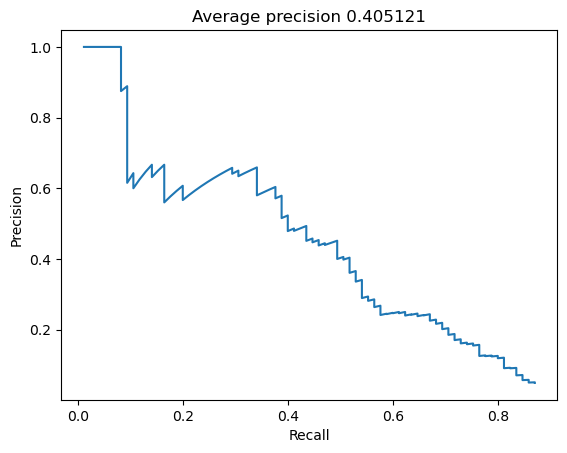

In [10]:

if params.has_annotations and params.use_hard_mining :
    dexter_facial_detector.hard_mine_detections(detections, scores, file_names)

# pt vizualizare
if params.has_annotations:
    print("has them")
    dexter_facial_detector.eval_detections(detections, scores, file_names)
    show_detections_with_ground_truth(detections, scores, file_names, params)
else:
    show_detections_without_ground_truth(detections, scores, file_names, params)